Installing YOLOv8 in Colab




In [ ]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.2 MB/s eta 0:00:00


Connecting Colab to drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Showcasing dataset that are uploaded into drive

In [ ]:
!ls /content/drive/MyDrive/Hackathon_Project/

Hackathon2_scripts.zip	hackathon2_test3.zip  hackathon2_train_1.zip


Dataset path

In [ ]:
!cp "/content/drive/MyDrive/Hackathon_Project/hackathon2_train_1.zip" ./
!cp "/content/drive/MyDrive/Hackathon_Project/hackathon2_test3.zip" ./
!cp "/content/drive/MyDrive/Hackathon_Project/Hackathon2_scripts.zip" ./

Training of dataset

In [ ]:
!mkdir -p dataset/train dataset/test dataset/scripts

import zipfile

with zipfile.ZipFile("hackathon2_train_1.zip","r") as zip_ref:
    zip_ref.extractall("dataset/train")

with zipfile.ZipFile("hackathon2_test3.zip","r") as zip_ref:
    zip_ref.extractall("dataset/test")

with zipfile.ZipFile("Hackathon2_scripts.zip","r") as zip_ref:
    zip_ref.extractall("dataset/scripts")

In [ ]:
!ls dataset/scripts/Hackathon2_scripts/

classes.txt  ENV_SETUP	predict.py  train.py  visualize.py  yolo_params.yaml


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data="dataset/scripts/Hackathon2_scripts/yolo_params.yaml" epochs=10 imgsz=640 batch=8 name="safety_detector"

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/scripts/Hackathon2_scripts/yolo_params.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=F

The `yolo_params.yaml` file needs to be updated with the correct `train` and `val` paths relative to its location. Given that `yolo_params.yaml` is in `dataset/scripts/Hackathon2_scripts/`, and the images are in `dataset/train/images/` and `dataset/test/images/`, the relative paths should be `../../train/images` and `../../test/images`.

Classes in dataset


In [ ]:
%%writefile dataset/scripts/Hackathon2_scripts/yolo_params.yaml
train: /content/dataset/train/train_1/train1/images
val: /content/dataset/train/train_1/val1/images

nc: 7
names:
  0: Oxygen Tank
  1: Nitrogen Tank
  2: First Aid Box
  3: Fire Alarm
  4: Safety Switch Panel
  5: Emergency Phone
  6: Fire extinguishers

Overwriting dataset/scripts/Hackathon2_scripts/yolo_params.yaml


Training of dataset dividing into epochs

In [ ]:
import os
import yaml
import zipfile
from ultralytics import YOLO
from google.colab import drive

# --- Ensure Google Drive is mounted ---
drive.mount('/content/drive', force_remount=True)

# --- Data preparation steps ---

# Define Google Drive path and zip file names
drive_project_path = "/content/drive/MyDrive/Hackathon_Project/"
zip_files_to_copy = [
    "hackathon2_train_1.zip",
    "hackathon2_test3.zip",
    "Hackathon2_scripts.zip"
]

# Verify existence of zip files in Google Drive before copying
all_zip_files_found = True
for zf in zip_files_to_copy:
    full_drive_path = os.path.join(drive_project_path, zf)
    if not os.path.exists(full_drive_path):
        print(f"Error: Required file not found in Google Drive: {full_drive_path}")
        print("Please ensure your Google Drive is correctly mounted and the zip files are in the specified folder.")
        all_zip_files_found = False
        break

if not all_zip_files_found:
    raise FileNotFoundError("One or more required zip files not found in Google Drive. Please check your Google Drive path and file presence.")

# Copy zip files from drive to current directory
for zf in zip_files_to_copy:
    !cp "{os.path.join(drive_project_path, zf)}" ./

# Create dataset directories
!mkdir -p dataset/train dataset/test dataset/scripts

# Unzip training data
with zipfile.ZipFile("hackathon2_train_1.zip","r") as zip_ref:
    zip_ref.extractall("dataset/train")

# Unzip test data
with zipfile.ZipFile("hackathon2_test3.zip","r") as zip_ref:
    zip_ref.extractall("dataset/test")

# Unzip scripts
with zipfile.ZipFile("Hackathon2_scripts.zip","r") as zip_ref:
    zip_ref.extractall("dataset/scripts")

# --- End data preparation ---

# Define the YAML content with confirmed absolute paths and class names
yaml_content = {
    'train': '/content/dataset/train/train_1/train1',
    'val': '/content/dataset/test/test3',
    'nc': 7,
    'names': [
        'Oxygen Tank',
        'Nitrogen Tank',
        'First Aid Box',
        'Fire Alarm',
        'Safety Switch Panel',
        'Emergency Phone',
        'Fire extinguishers'
    ]
}

# Define the path for the YAML file
yaml_path = 'dataset/scripts/Hackathon2_scripts/yolo_params.yaml'

# Ensure the directory for the YAML file exists
os.makedirs(os.path.dirname(yaml_path), exist_ok=True)

# Write the YAML content to the file
with open(yaml_path, 'w') as f:
    yaml.dump(yaml_content, f)

# Verify the file was written (optional, for debugging)
if os.path.exists(yaml_path):
    print(f"'{yaml_path}' successfully created.")
else:
    print(f"Error: '{yaml_path}' was not created.")

# --- Diagnostic: Verify dataset paths and contents from Python ---
train_path = yaml_content['train']
train_images_path = os.path.join(train_path, 'images')
train_labels_path = os.path.join(train_path, 'labels')
val_path = yaml_content['val']
val_images_path = os.path.join(val_path, 'images')
val_labels_path = os.path.join(val_path, 'labels')

print(f"\nPython path existence checks:")
print(f"Train directory ({train_path}) exists: {os.path.exists(train_path)}")
print(f"Train images directory ({train_images_path}) exists: {os.path.exists(train_images_path)}")
print(f"Train labels directory ({train_labels_path}) exists: {os.path.exists(train_labels_path)}")
print(f"Val directory ({val_path}) exists: {os.path.exists(val_path)}")
print(f"Val images directory ({val_images_path}) exists: {os.path.exists(val_images_path)}")
print(f"Val labels directory ({val_labels_path}) exists: {os.path.exists(val_labels_path)}")

if os.path.exists(train_images_path) and os.path.isdir(train_images_path) and \
   os.path.exists(train_labels_path) and os.path.isdir(train_labels_path):
    print(f"Train: Both images and labels directories exist and are directories in {train_path}")
    if not os.listdir(train_images_path): print(f"Warning: {train_images_path} is empty!")
    if not os.listdir(train_labels_path): print(f"Warning: {train_labels_path} is empty!")
else:
    print(f"Error: Train images or labels directory is missing or not a directory in {train_path}")

if os.path.exists(val_images_path) and os.path.isdir(val_images_path) and \
   os.path.exists(val_labels_path) and os.path.isdir(val_labels_path):
    print(f"Val: Both images and labels directories exist and are directories in {val_path}")
    if not os.listdir(val_images_path): print(f"Warning: {val_images_path} is empty!")
    if not os.listdir(val_labels_path): print(f"Warning: {val_labels_path} is empty!")
else:
    print(f"Error: Val images or labels directory is missing or not a directory in {val_path}")

# --- End Diagnostic ---

# Load pre-trained YOLOv8 small model
model = YOLO("yolov8n.pt")

# Train using the newly created YAML file
model.train(
    data=yaml_path,  # Use the dynamically created YAML file
    epochs=10,        # fewer epochs for quick training
    imgsz=640,
    batch=8,
    name="safety_detector"
)

Mounted at /content/drive
'dataset/scripts/Hackathon2_scripts/yolo_params.yaml' successfully created.

Python path existence checks:
Train directory (/content/dataset/train/train_1/train1) exists: True
Train images directory (/content/dataset/train/train_1/train1/images) exists: True
Train labels directory (/content/dataset/train/train_1/train1/labels) exists: True
Val directory (/content/dataset/test/test3) exists: True
Val images directory (/content/dataset/test/test3/images) exists: True
Val labels directory (/content/dataset/test/test3/labels) exists: True
Train: Both images and labels directories exist and are directories in /content/dataset/train/train_1/train1
Val: Both images and labels directories exist and are directories in /content/dataset/test/test3
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78264a52f3e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

Description of training and testing dataset images

In [ ]:
!ls -R /content/dataset/train/
!ls -R /content/dataset/test/

/content/dataset/train/:
train_1

/content/dataset/train/train_1:
train1	val1

/content/dataset/train/train_1/train1:
images	labels

/content/dataset/train/train_1/train1/images:
000000000_light_cluttered.png	    000000757_light_uncluttered.png
000000003_cluttered_room.png	    000000761_light_cluttered.png
000000003_light_cluttered.png	    000000761_light_cluttered_room.png
000000003_light_uncluttered.png     000000762_cluttered_room.png
000000004_cluttered_hallway.png     000000762_light_cluttered_room.png
000000006_light_cluttered.png	    000000764_cluttered_hallway.png
000000006_light_cluttered_room.png  000000765_light_cluttered.png
000000008_cluttered_hallway.png     000000766_cluttered_hallway.png
000000008_cluttered_room.png	    000000766_cluttered_room.png
000000009_light_cluttered_room.png  000000768_light_cluttered_room.png
000000009_light_uncluttered.png     000000770_cluttered_room.png
000000010_cluttered_hallway.png     000000770_light_cluttered_room.png
000000011_cluttere

In [ ]:
Confusion Matrix graphs and curves

Confusion Matrix:


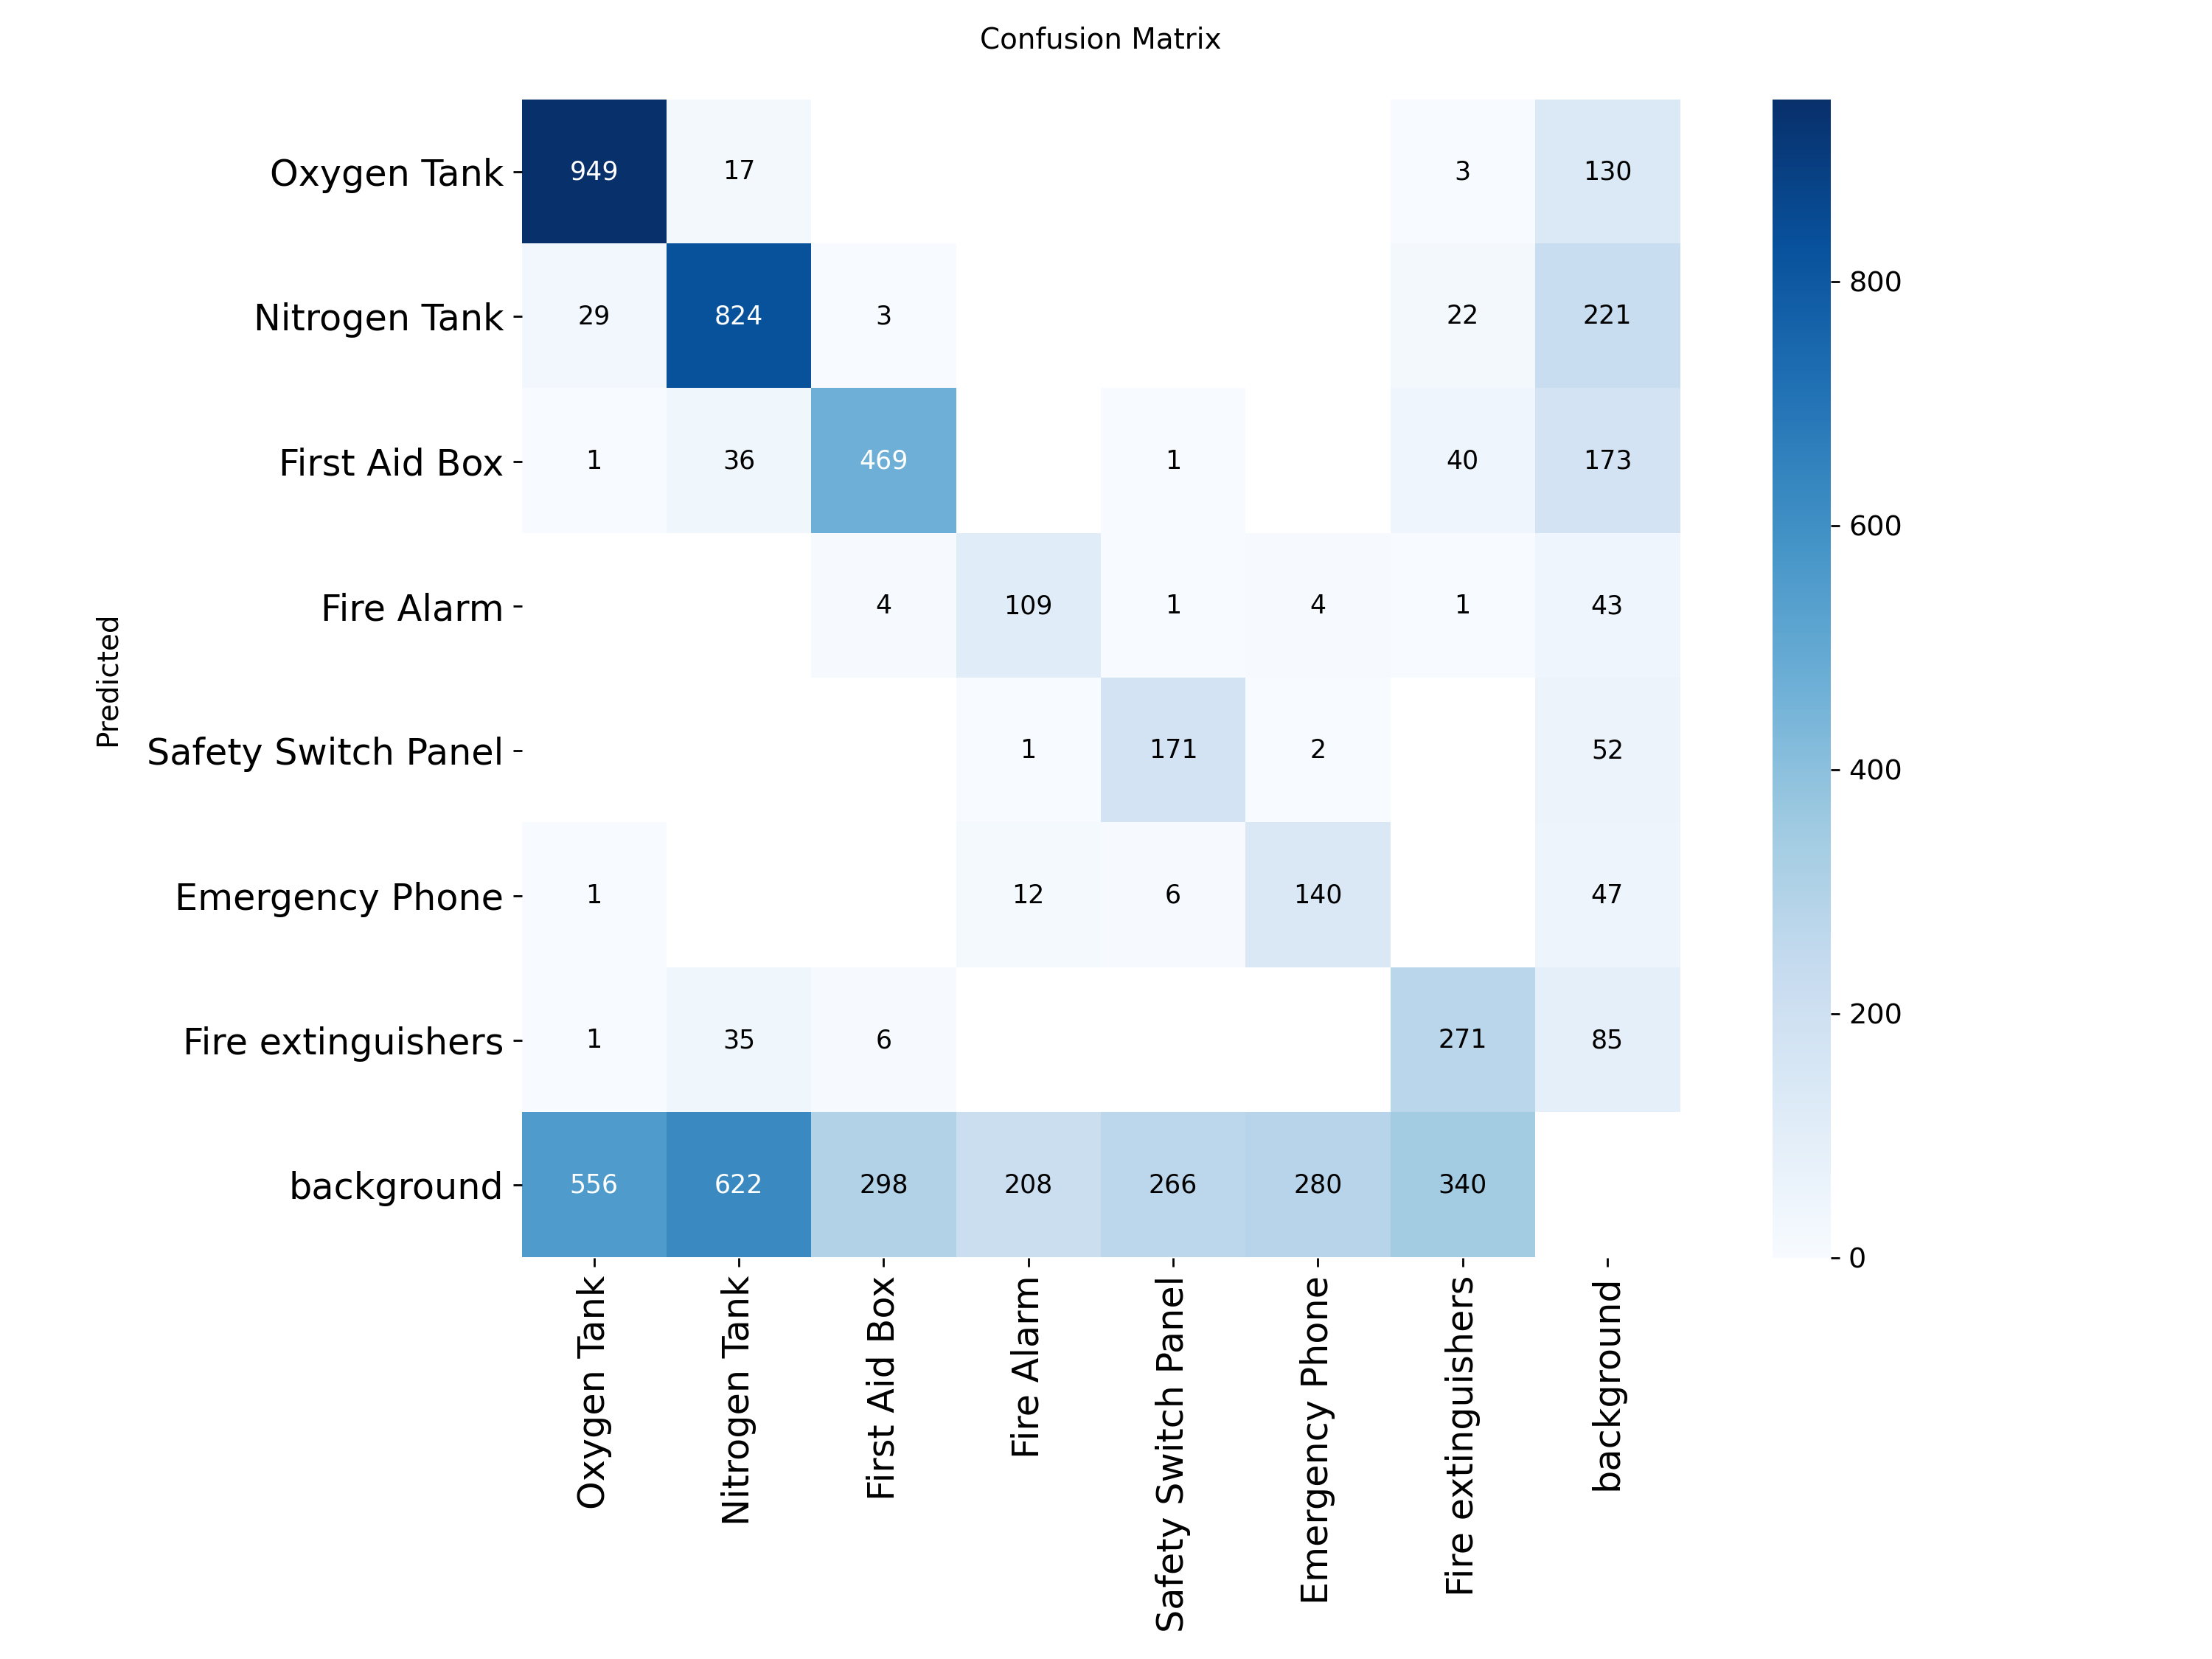


F1-Confidence Curve:


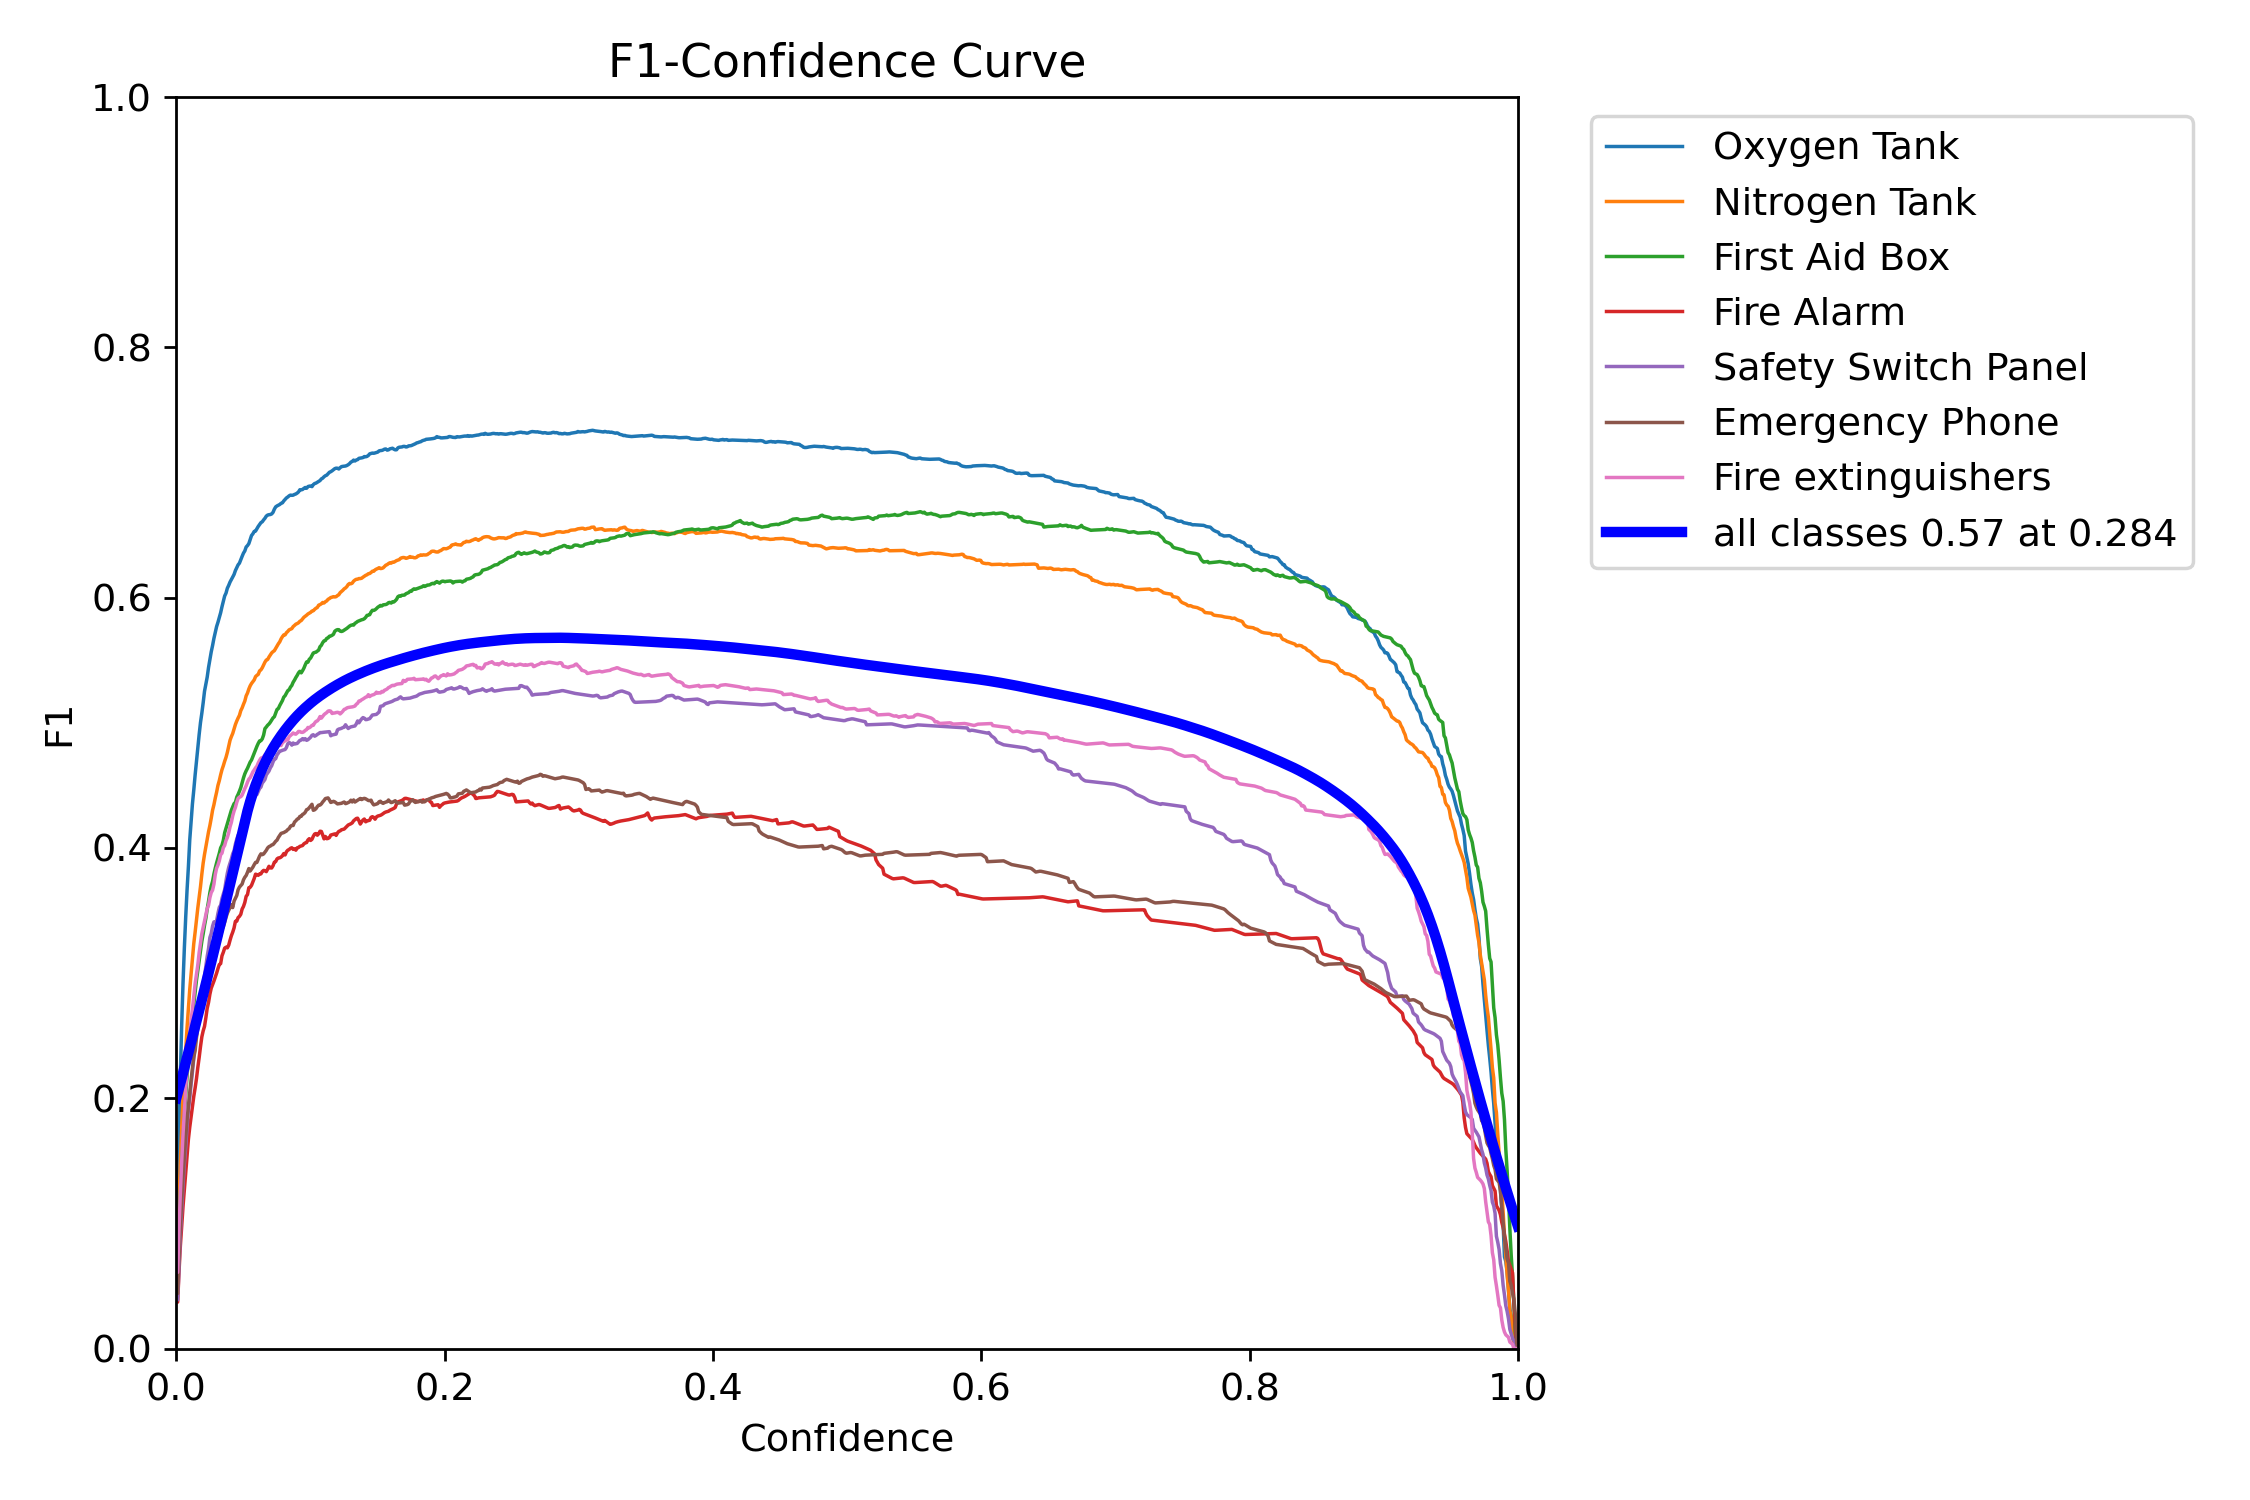


Precision-Recall Curve:


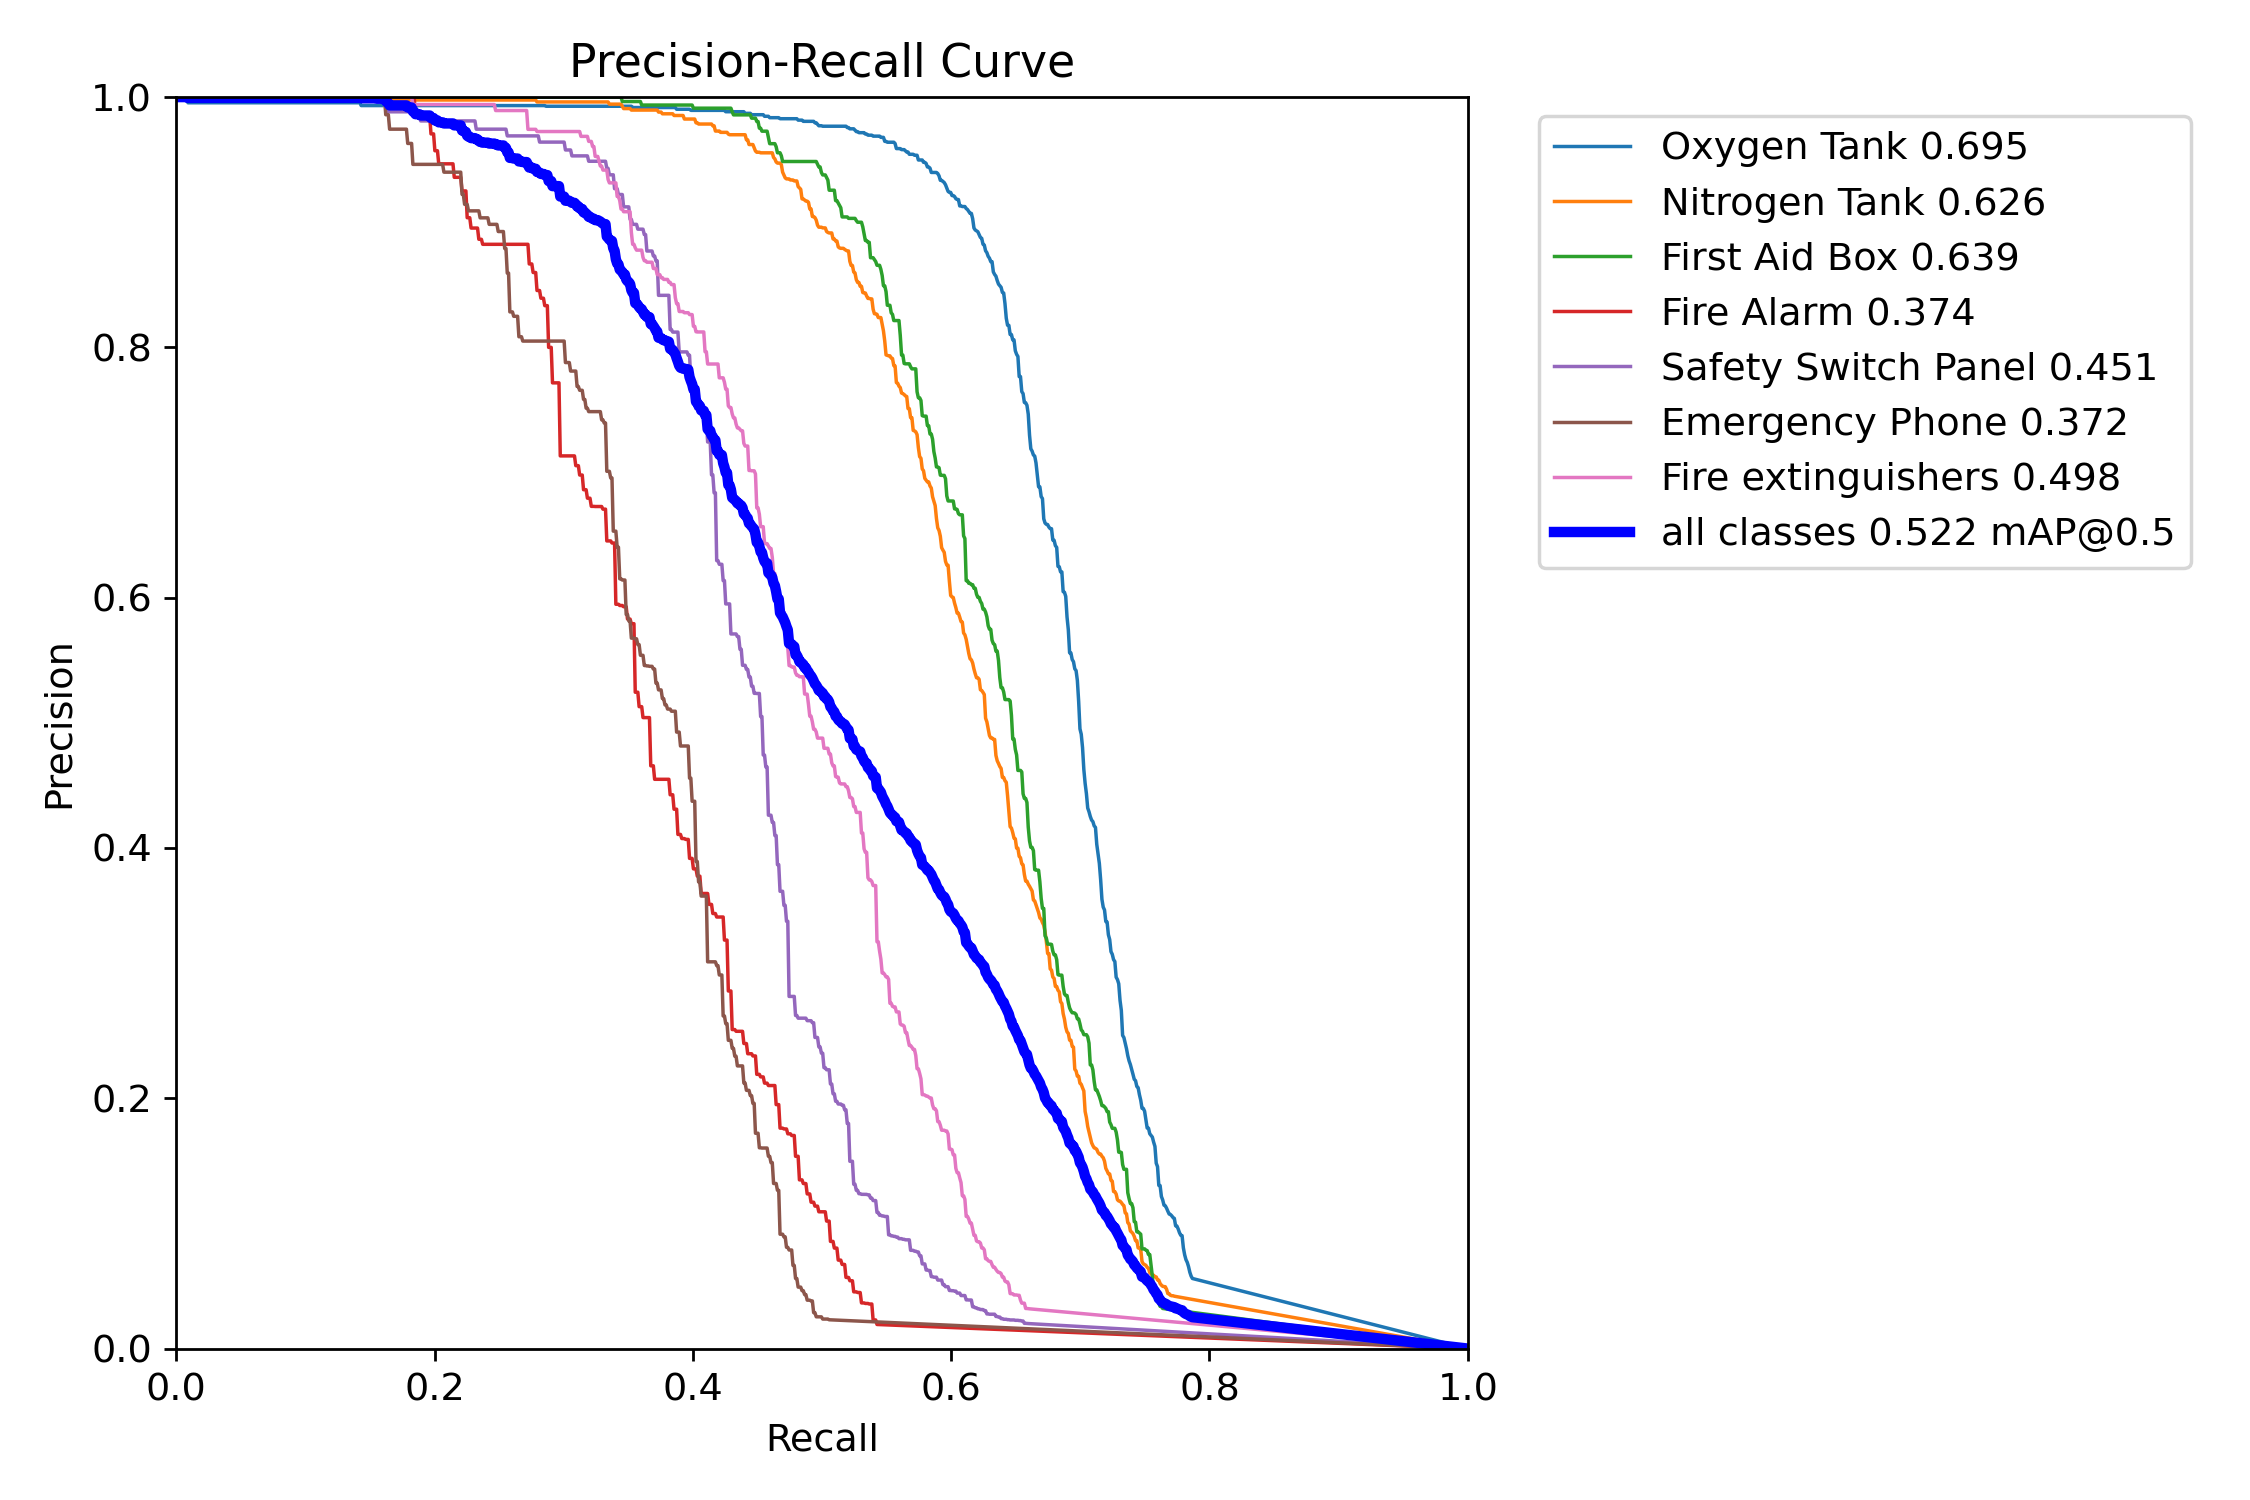


Training and Validation Metrics:


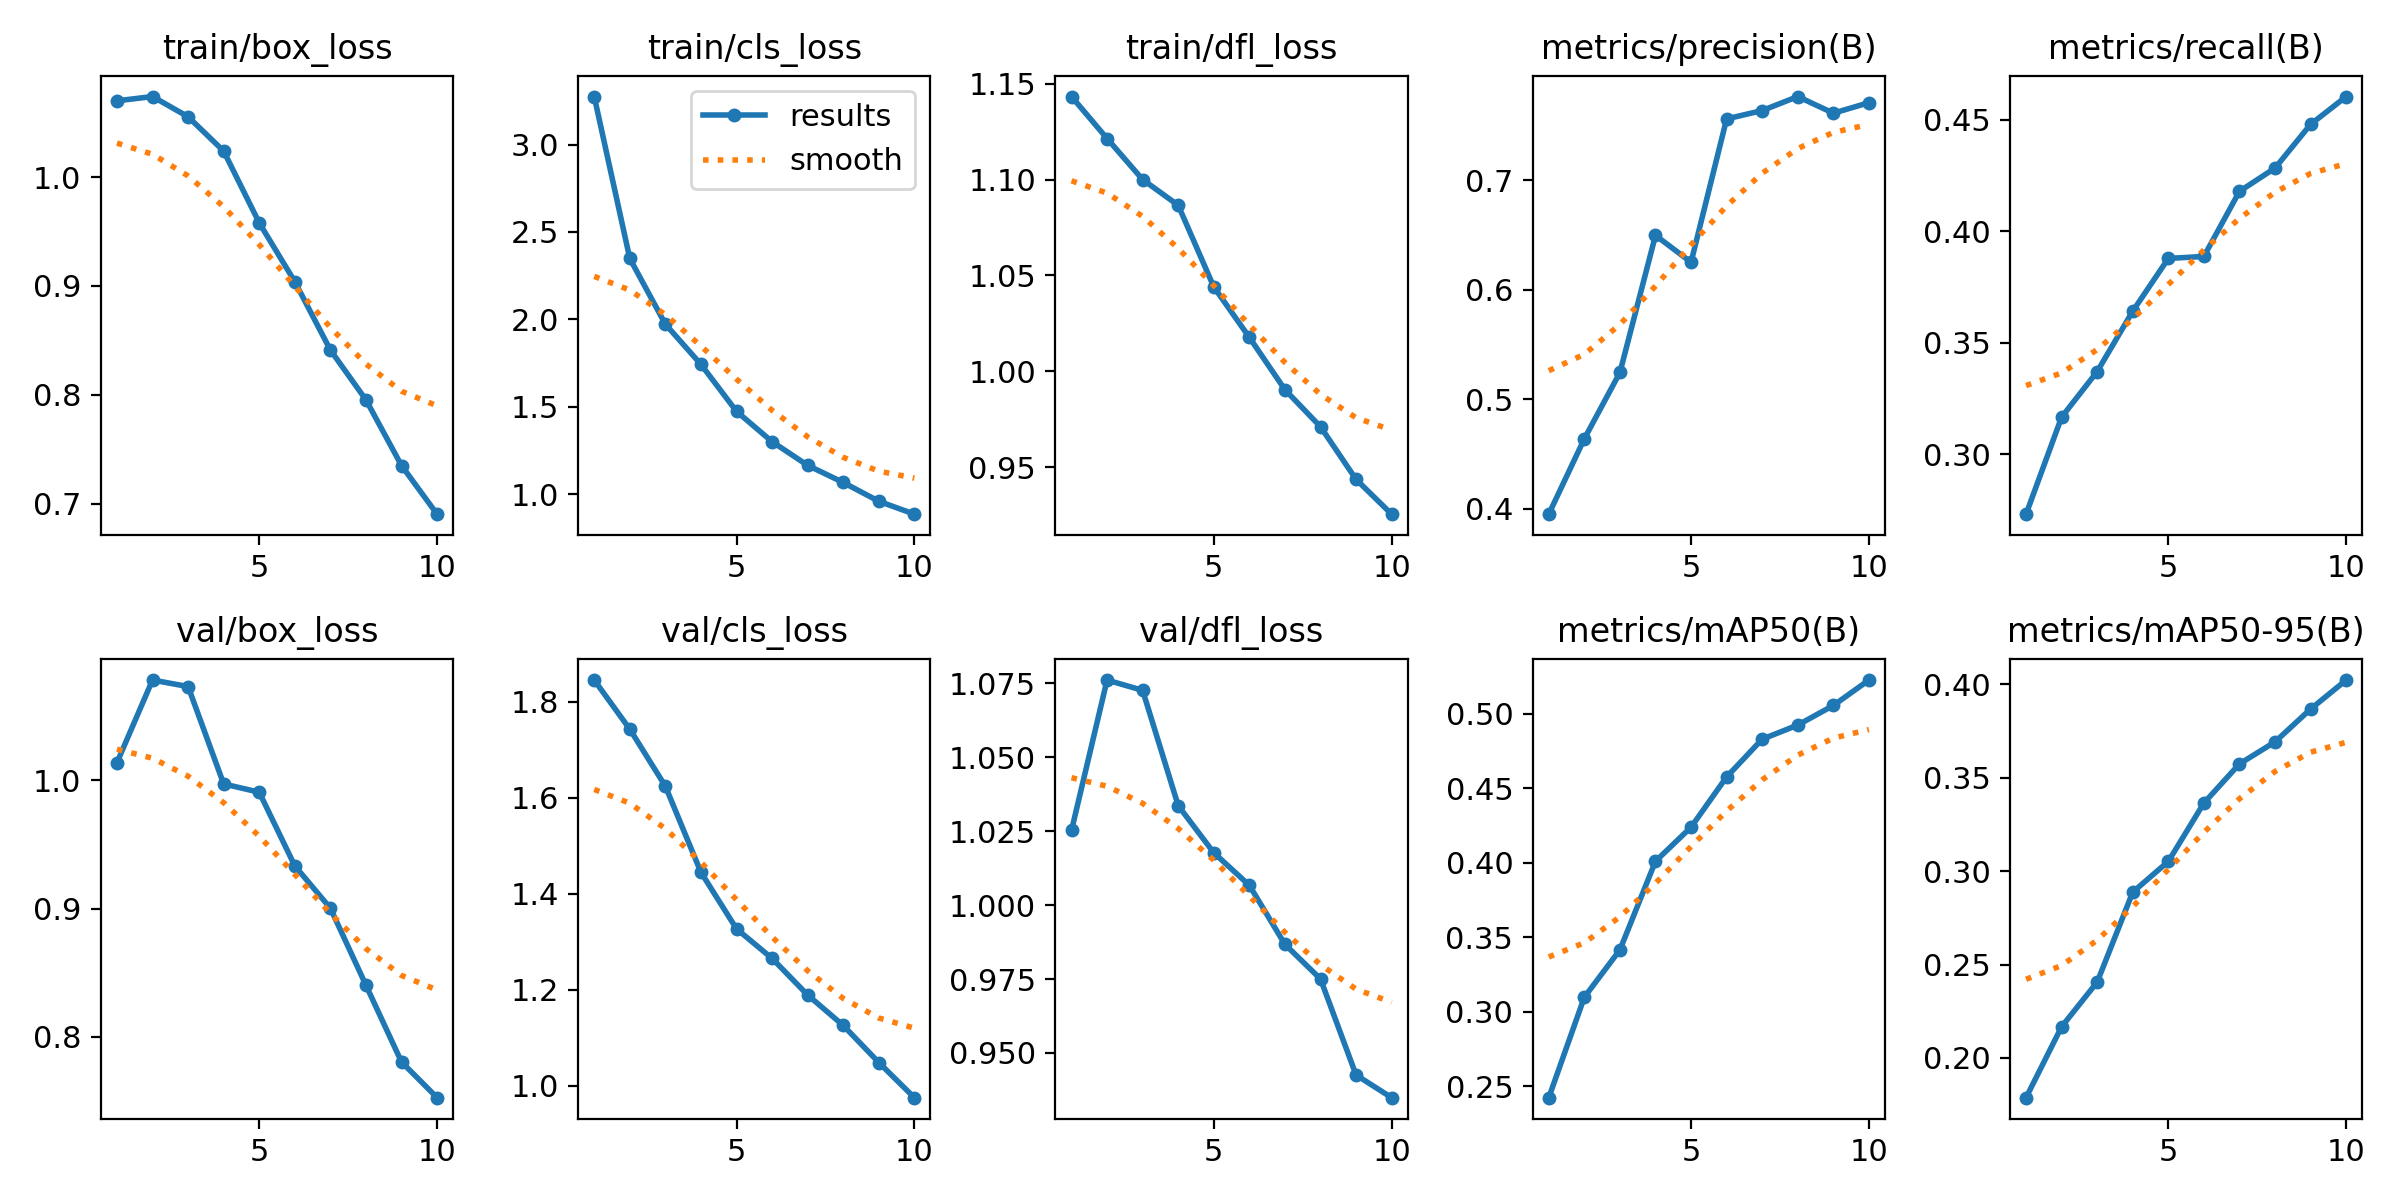

In [ ]:
from IPython.display import Image, display

# Display Confusion Matrix
print("Confusion Matrix:")
display(Image(filename='/content/runs/detect/safety_detector9/confusion_matrix.png', width=600))

# Display F1-Confidence Curve
print("\nF1-Confidence Curve:")
display(Image(filename='/content/runs/detect/safety_detector9/BoxF1_curve.png', width=600))

# Display Precision-Recall Curve
print("\nPrecision-Recall Curve:")
display(Image(filename='/content/runs/detect/safety_detector9/BoxPR_curve.png', width=600))

# Display training and validation metrics
print("\nTraining and Validation Metrics:")
display(Image(filename='/content/runs/detect/safety_detector9/results.png', width=600))

Showing result into csv format

In [ ]:
import pandas as pd
results_df = pd.read_csv('/content/runs/detect/safety_detector9/results.csv')
display(results_df.head())

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,201.683,1.07018,3.27483,1.14324,0.39483,0.27305,0.24227,0.17876,1.01362,1.84519,1.02525,0.000302,0.000302,0.000302
1,2,396.103,1.07411,2.34831,1.12137,0.46374,0.31659,0.30974,0.21673,1.07796,1.74293,1.07612,0.000545,0.000545,0.000545
2,3,589.704,1.05551,1.97246,1.09998,0.52425,0.33703,0.34147,0.24062,1.07289,1.62419,1.07263,0.000728,0.000728,0.000728
3,4,784.475,1.02397,1.74249,1.08657,0.64948,0.36414,0.40093,0.28877,0.99704,1.44492,1.03364,0.000639,0.000639,0.000639
4,5,978.618,0.95800,1.47376,1.04405,0.62499,0.38778,0.42381,0.30519,0.99056,1.32714,1.01771,0.000549,0.000549,0.000549
